In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('../common')
from commonfunctions import visualize_cluster_data

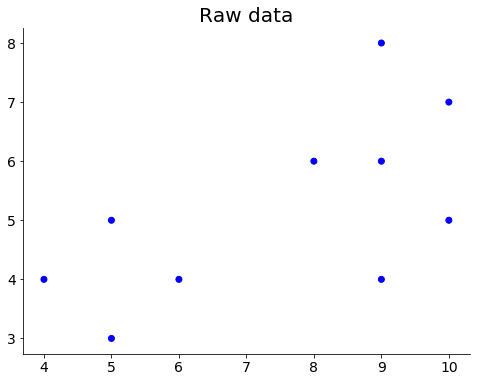

In [2]:
X = pd.read_csv('../Data/data2.csv').iloc[:, [1,2]].values
clusters = [2] * X.shape[0]
visualize_cluster_data(plt, X, clusters, 'Raw data', filename='SpectralRawData')

# Algorithm

## 1. Calculate the distance matrix

## 2. Convert to affinity matrix and look for eigen vectors

## 3. Apply k-means on the eigenvectors

We will use kneighbors_graph for calculating the distance matrix

In [3]:
# Calculate the euclidean distance
from sklearn.neighbors import kneighbors_graph
connectivity = kneighbors_graph(X, X.shape[0] - 1, mode='distance')

# Set appropriate print options and print the distance matrix
np.set_printoptions(precision=1, suppress=True)
connectivity = connectivity.toarray()
print(connectivity)

[[ 0.   1.4  2.   1.4  4.1  3.2  5.4  5.   5.   4.1]
 [ 1.4  0.   1.4  2.   5.   4.5  6.7  6.4  6.1  5.4]
 [ 2.   1.4  0.   1.4  4.1  4.2  6.4  6.4  5.4  5. ]
 [ 1.4  2.   1.4  0.   3.   2.8  5.   5.   4.1  3.6]
 [ 4.1  5.   4.1  3.   0.   2.2  3.2  4.   1.4  2. ]
 [ 3.2  4.5  4.2  2.8  2.2  0.   2.2  2.2  2.2  1. ]
 [ 5.4  6.7  6.4  5.   3.2  2.2  0.   1.4  2.   1.4]
 [ 5.   6.4  6.4  5.   4.   2.2  1.4  0.   3.2  2. ]
 [ 5.   6.1  5.4  4.1  1.4  2.2  2.   3.2  0.   1.4]
 [ 4.1  5.4  5.   3.6  2.   1.   1.4  2.   1.4  0. ]]


Convert the distance matris to affinity 

In [4]:
affinity = np.exp(- connectivity ** 2 )
print(affinity)

[[ 1.   0.1  0.   0.1  0.   0.   0.   0.   0.   0. ]
 [ 0.1  1.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.1  1.   0.1  0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.   0.1  1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.   0.   0.1  0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.4]
 [ 0.   0.   0.   0.   0.   0.   1.   0.1  0.   0.1]
 [ 0.   0.   0.   0.   0.   0.   0.1  1.   0.   0. ]
 [ 0.   0.   0.   0.   0.1  0.   0.   0.   1.   0.1]
 [ 0.   0.   0.   0.   0.   0.4  0.1  0.   0.1  1. ]]


Check the output we calculated with the output of actual clustering 

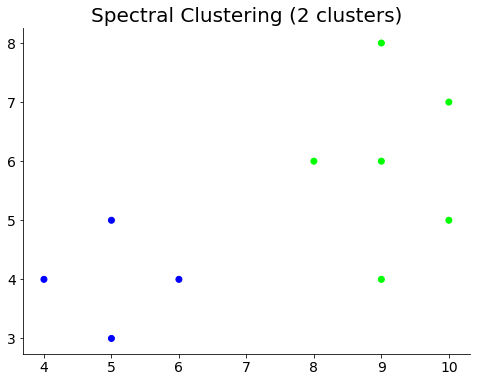

In [5]:
# Perform spectral clustering
from sklearn.cluster import SpectralClustering
estimator = SpectralClustering(n_clusters = 2)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'Spectral Clustering (2 clusters)', filename='spectralexample1')

In [6]:
print(estimator.affinity_matrix_)

[[ 1.   0.1  0.   0.1  0.   0.   0.   0.   0.   0. ]
 [ 0.1  1.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.1  1.   0.1  0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.   0.1  1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.   0.   0.1  0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.4]
 [ 0.   0.   0.   0.   0.   0.   1.   0.1  0.   0.1]
 [ 0.   0.   0.   0.   0.   0.   0.1  1.   0.   0. ]
 [ 0.   0.   0.   0.   0.1  0.   0.   0.   1.   0.1]
 [ 0.   0.   0.   0.   0.   0.4  0.1  0.   0.1  1. ]]


Check difference between the 2 matrix. Output should be 0

In [7]:
print(np.sum(estimator.affinity_matrix_ - affinity >= 0.01)) # Expected value = 0

0


Check the output for number of clusters = 3

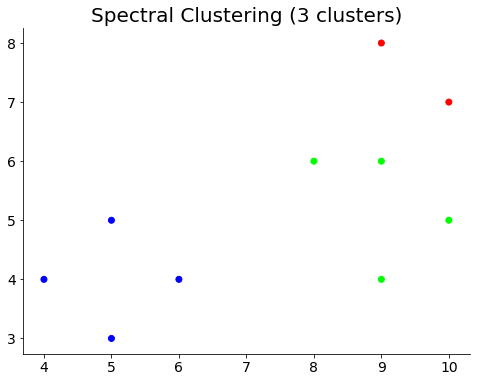

In [8]:
# Perform spectral clustering
from sklearn.cluster import SpectralClustering

estimator = SpectralClustering(n_clusters = 3)
estimator.fit(X)
visualize_cluster_data(plt, X, estimator.labels_, 'Spectral Clustering (3 clusters)', filename='spectralexample2')

Make sure that the affinity matrix remains the same. This is because, the affinity matrix captures the structure of the data. Clustering is applied after this calculation.

In [9]:
print(estimator.affinity_matrix_)

[[ 1.   0.1  0.   0.1  0.   0.   0.   0.   0.   0. ]
 [ 0.1  1.   0.1  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.1  1.   0.1  0.   0.   0.   0.   0.   0. ]
 [ 0.1  0.   0.1  1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   1.   0.   0.   0.   0.1  0. ]
 [ 0.   0.   0.   0.   0.   1.   0.   0.   0.   0.4]
 [ 0.   0.   0.   0.   0.   0.   1.   0.1  0.   0.1]
 [ 0.   0.   0.   0.   0.   0.   0.1  1.   0.   0. ]
 [ 0.   0.   0.   0.   0.1  0.   0.   0.   1.   0.1]
 [ 0.   0.   0.   0.   0.   0.4  0.1  0.   0.1  1. ]]
